## 소리 데이터에 대한 이해

In [1]:
import librosa

In [2]:
import sounddevice as sd

In [3]:
example_file_path = librosa.ex('trumpet')
print(f'예제 파일은 다음 위치에 있습니다\n파일 경로: {example_file_path}')

예제 파일은 다음 위치에 있습니다
파일 경로: /Users/henris/Library/Caches/librosa/sorohanro_-_solo-trumpet-06.ogg


In [4]:
y, sr = librosa.load(example_file_path)

/Users/henris/.pyenv/versions/3.7.3/envs/scream/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [5]:
sd.play(y)

In [6]:
print(f'y : {y}\nsampling_rate : {sr}')

y : [-0.00140381 -0.00045776 -0.00039673 ...  0.          0.
  0.        ]
sampling_rate : 22050


In [7]:
print(f'y는 {len(y)} 길이의 벡터')

y는 117888 길이의 벡터


In [8]:
print(f'y의 앞 20개 값은?\n{y[:20]}')

y의 앞 20개 값은?
[-1.4038086e-03 -4.5776367e-04 -3.9672852e-04  9.1552734e-05
  3.0517578e-05 -1.8310547e-04 -3.6621094e-04  1.5258789e-04
  5.1879883e-04  1.4953613e-03  1.8615723e-03  9.1552734e-04
 -3.9672852e-04 -2.0446777e-03 -1.2817383e-03 -5.4931641e-04
  8.8500977e-04  9.7656250e-04  1.0070801e-03 -1.2817383e-03]


In [9]:
print(f'y는 {len(y) / sr} 초의 신호 벡터!')

y는 5.346394557823129 초의 신호 벡터!


In [10]:
from matplotlib import pyplot as plt

In [11]:
sr

22050

In [12]:
x = [i / sr for i in range(len(y))]

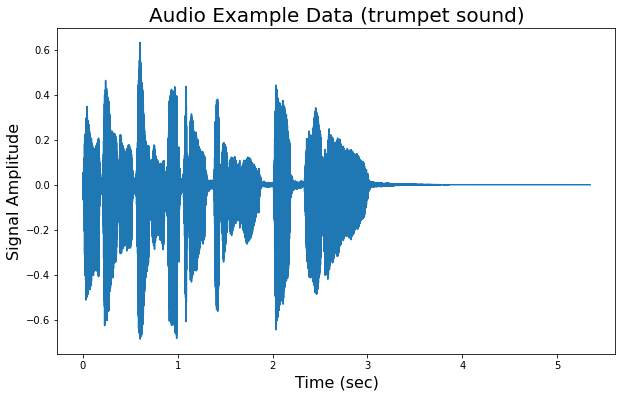

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

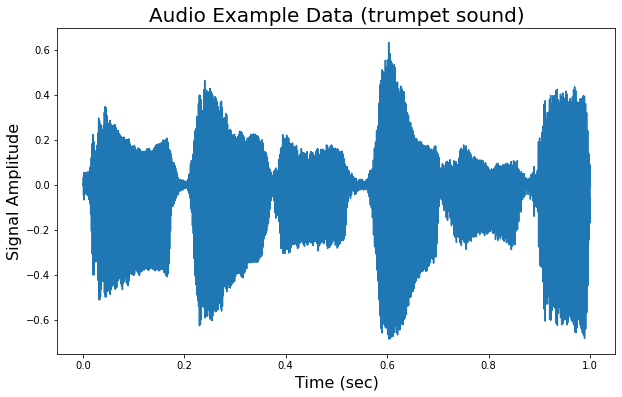

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x[:sr], y[:sr])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

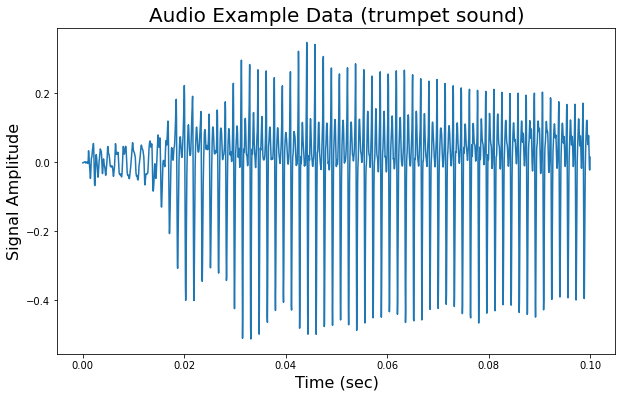

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x[: sr // 10], y[: sr // 10])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

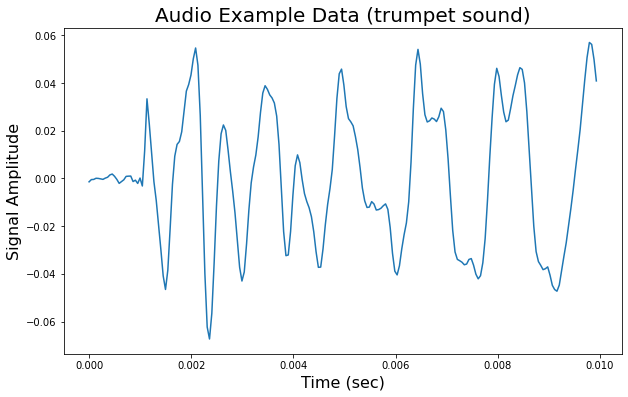

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(x[: sr // 100], y[: sr // 100])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

In [18]:
sd.play(y)

## Frame Processing

In [19]:
import librosa
import pandas as pd
import numpy as np

In [22]:
example_audio_path = './example/꿩+klankbeeld.wav'
example_label_path = './example/꿩+klankbeeld.txt'

frame_size = 1
stride = 0.2

In [23]:
example_audio, example_sr = librosa.load(example_audio_path)

In [24]:
print(
    f'audio 벡터 길이 : {len(example_audio)}\
    \naudio 파일 길이 : {len(example_audio) / example_sr} 초'
    
)

audio 벡터 길이 : 85604    
audio 파일 길이 : 3.882267573696145 초


In [25]:
example_label = pd.read_csv(
    example_label_path, sep='\t', names=['start(s)', 'end(s)', 'label']
)

In [26]:
print(
    f'label :\
    \n{example_label}'
)

label :    
   start(s)    end(s)  label
0   0.00000  1.191226      0
1   1.33714  3.210092      0


In [27]:
idx = example_label['end(s)'] - example_label['start(s)'] > frame_size

example_label = example_label[idx]

In [28]:
each_n_frames = (
    np.floor(
        (
            (
                (example_label['end(s)'] - example_label['start(s)']) - frame_size
            ) / stride
        ) + 1
    )
).astype(int).values

In [29]:
total_n_frames = sum(each_n_frames)

In [30]:
print(f'각각의 구간마다 프레임 개수 : {each_n_frames}')
print(f'총 구간의 프레임 개수 : {total_n_frames}')

각각의 구간마다 프레임 개수 : [1 5]
총 구간의 프레임 개수 : 6


In [31]:
frame_vectors = np.zeros((int(total_n_frames), frame_size * example_sr))
target_vectors = np.zeros((int(total_n_frames)))

In [32]:
print(
    f'frame_vectors의 shape : {frame_vectors.shape}\
    \ntarget_vectors의 shape : {target_vectors.shape}'
)

frame_vectors의 shape : (6, 22050)    
target_vectors의 shape : (6,)


In [33]:
for i in range(len(frame_vectors)):
    print(f'{i}-th frame vector[:5] : {frame_vectors[i][:5]}')
print(f'target_vectors : {target_vectors}')

0-th frame vector[:5] : [0. 0. 0. 0. 0.]
1-th frame vector[:5] : [0. 0. 0. 0. 0.]
2-th frame vector[:5] : [0. 0. 0. 0. 0.]
3-th frame vector[:5] : [0. 0. 0. 0. 0.]
4-th frame vector[:5] : [0. 0. 0. 0. 0.]
5-th frame vector[:5] : [0. 0. 0. 0. 0.]
target_vectors : [0. 0. 0. 0. 0. 0.]


In [34]:
print(
    f'frame vectors의 shape : {frame_vectors.shape}'
)

frame vectors의 shape : (6, 22050)


In [35]:
current_idx = 0

for i, (start, end, y) in example_label.iterrows():
    for j in range(each_n_frames[i]):
        start_idx = int((start + j * stride) * example_sr)
        end_idx = start_idx + frame_size * example_sr
        frame_vectors[current_idx] = example_audio[start_idx:end_idx]
        target_vectors[current_idx] = y
        current_idx += 1

In [36]:
print(
    f'frame_vectors의 shape : {frame_vectors.shape}\
    \ntarget_vectors의 shape : {target_vectors.shape}'
)

frame_vectors의 shape : (6, 22050)    
target_vectors의 shape : (6,)


In [37]:
for i in range(len(frame_vectors)):
    print(f'{i}-th frame vector[:5] : {frame_vectors[i][:5]}')
print(f'target_vectors : {target_vectors}')

0-th frame vector[:5] : [-0.00265772  0.00103548  0.00018767 -0.00690498 -0.00465354]
1-th frame vector[:5] : [0.00462255 0.00474213 0.00503599 0.00415416 0.00215303]
2-th frame vector[:5] : [0.01052688 0.01409292 0.0158177  0.01223616 0.00895123]
3-th frame vector[:5] : [-0.00730914 -0.01086354 -0.0084091  -0.01000284 -0.01859629]
4-th frame vector[:5] : [0.05644109 0.06171763 0.05151632 0.03100646 0.016623  ]
5-th frame vector[:5] : [-0.001992   -0.00298869  0.00015296  0.00136695 -0.00181217]
target_vectors : [0. 0. 0. 0. 0. 0.]


## Feature Extraction: Mel Spectrogram

In [38]:
from matplotlib import pyplot as plt
import sounddevice as sd
from librosa.display import specshow

In [39]:
y = frame_vectors[1]

In [40]:
sd.play(y)

In [41]:
print(
    f'벡터의 shape : {y.shape}\
    \n벡터의 대략적인 모습은.. :\n {y}'
)

벡터의 shape : (22050,)    
벡터의 대략적인 모습은.. :
 [ 0.00462255  0.00474213  0.00503599 ... -0.00755864 -0.00101585
  0.00437011]


In [42]:
x = [t / example_sr for t in range(len(y))]

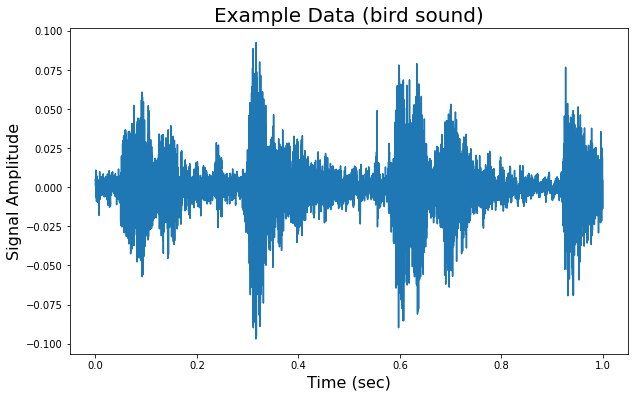

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()


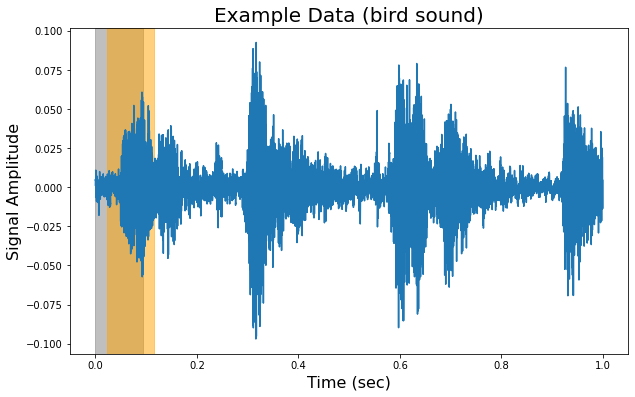

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.axvspan(xmin=0, xmax=2048 / example_sr, color='gray', alpha=0.5)
plt.axvspan(
    xmin=512 / example_sr, xmax=(2048 + 512) / example_sr,
    color='orange', alpha=0.5
)
plt.show()

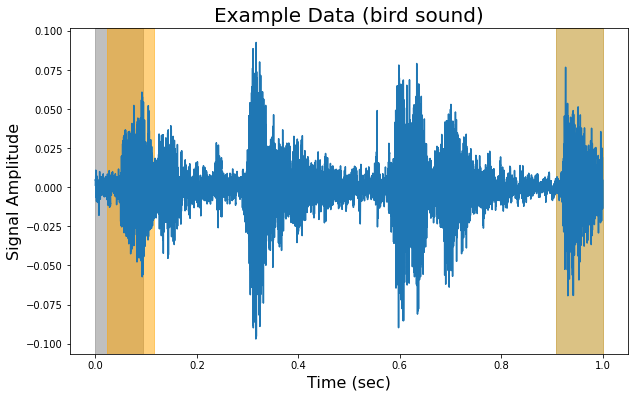

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.axvspan(
    xmin=0, xmax=2048 / example_sr, color='gray', alpha=0.5
)
plt.axvspan(
    xmin=512 / example_sr, xmax=(2048 + 512 ) / example_sr,
    color='orange', alpha=0.5
)
plt.axvspan(
    xmin=(example_sr - 2048) / example_sr, xmax=example_sr / example_sr,
    color='darkgoldenrod', alpha=0.5
)
plt.show()

In [46]:
S = librosa.feature.melspectrogram(y=y, sr=example_sr)

In [47]:
S.shape

(128, 44)

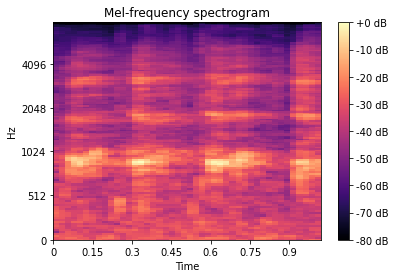

In [50]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = specshow(
    S_dB, x_axis='time', y_axis='mel',
    sr=example_sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

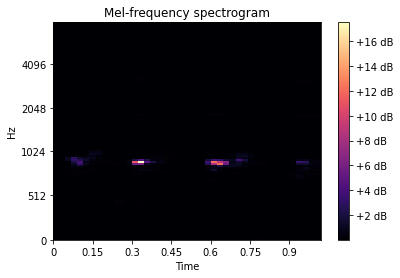

In [49]:
fig, ax = plt.subplots()
img = specshow(
    S, x_axis='time', y_axis='mel',
    sr=example_sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

In [51]:
print(
    f'1초 신호 데이터는 다음과 같이 변합니다.\
    \nBefore shape (signal) : {y.shape}\
    \nAfter shape (Mel Spectrogram) : {S_dB.shape}'
)

1초 신호 데이터는 다음과 같이 변합니다.    
Before shape (signal) : (22050,)    
After shape (Mel Spectrogram) : (128, 44)


In [52]:
S_power = librosa.db_to_power(S_dB)

In [53]:
sd.play(y, 22050)

In [54]:
sd.play(librosa.feature.inverse.mel_to_audio(S_power), 22050)

In [55]:
sd.play(librosa.feature.inverse.mel_to_audio(S_dB), 22050)

## 레이블 데이터 정리

In [56]:
from os import listdir
from os.path import join, splitext
import pandas as pd

In [57]:
label_path = './data/labels/'
label_files = [
    f for f in listdir(label_path)
    if splitext(join(label_path, f))[-1] == '.txt'
]

In [58]:
print(
    f'label file 목록 예시 : {label_files[:3]}'
)

label file 목록 예시 : ['gun5.txt', 'maleyell.txt', 'aarrgghh.txt']


In [59]:
list_file_fn = 'file_list.xlsx'  # (1)
file_n = 0
with pd.ExcelWriter(list_file_fn) as writer:  # (2)
    audio_names = []  # (3)
    for i, file_name in enumerate(label_files):
        if file_name[:-3] + 'wav' not in listdir('./data/raw_data/'):
            raise FileNotFoundErrorError('file not match')
        if file_name[:-3] + 'wav' in listdir('./data/raw_data/'):
            temp = pd.read_csv(label_path + file_name, sep='\t', header=None)
            temp.columns = ['start(s)', 'end(s)', 'label']
            temp.to_excel(writer, index=False, sheet_name=str(file_n))  # (4)
            file_n += 1
            audio_names.append(file_name[:-3] + 'wav')  # (5)
        if i == len(label_files) - 1:  # (6)
            pd.DataFrame(
                audio_names, columns=['audio_name']
            ).to_excel(writer, sheet_name='list')

## 전체 데이터 전처리

In [60]:
import time
import math

import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa
from torch.utils.data import Dataset, DataLoader

In [61]:
def load_label_data(file_path, i, frame_size):
    audio_label = pd.read_excel(file_path, sheet_name=str(i))  # (1)
    audio_label['label'] = audio_label['label'].apply(lambda x: int(str(x)[0]))
 
    audio_label = np.array(audio_label)  # (2)
    audio_label = audio_label[
        (audio_label[:, 1] - audio_label[:, 0] > frame_size)
    ]  # (3)
    return audio_label
 
def load_sound_data(file_path, sampling_rate):
    audio, sr = librosa.load(file_path, sr=sampling_rate)  # (4)
    return audio, sr

In [62]:
def process_frame(audio, sr, label, frame_size=1, stride=0.2):
    n = np.sum(
        np.floor(
            ((label[:, 1] - label[:, 0]) - frame_size) / stride + frame_size
        )
    )  # (1)
 
    frame_vector = np.zeros((int(n), frame_size * sr))  # (2)
    target_vector = np.zeros((int(n), 1))  # (3)
 
    i = 0
 
    for temp_label in label:  # (4)
        start = temp_label[0]  # (5)
        end = temp_label[1]  # (6)
        y = temp_label[2]  # (7)
 
        eter = int(np.floor((((end - start) - frame_size) / stride) + 1))  # (8)
 
        for j in range(eter):  # (9)
            start_idx = int((start + j * stride) * sr)
            end_idx = start_idx + frame_size * sr
            frame_vector[i] = audio[start_idx:end_idx]  # (10)
            target_vector[i] = y  # (11)
            i += 1
    return frame_vector, target_vector

In [63]:
def extract_mel_feature(frame_vector, sr, n_mels, st=512):
    mel_feature = librosa.feature.melspectrogram(
        y=frame_vector, sr=sr, n_mels=n_mels, hop_length=st
    )  # (1)
    mel_feature = librosa.core.power_to_db(
        mel_feature, ref=np.max
    )  # (2)
    return mel_feature

In [64]:
def extract_mel_power_feature(frame_vector, sr, n_mels, st=512):
    mel_feature = librosa.feature.melspectrogram(
        y=frame_vector, sr=sr, n_mels=n_mels, hop_length=st
    )  # (1)
    return mel_feature

In [65]:
sr = 22050
frame_size = 1
stride = 0.2
n_mels = 64
n_feature = 34
short_time = 512
 
file_list = pd.read_excel('./file_list.xlsx', sheet_name='list')  # (1)
 
frame_vectors = []
label_vectors = []
idx_count = []
 
for file_i, file_name in enumerate(file_list['audio_name']):  # (2)
    if file_i % 10 == 0:
        print(f'{file_i}-th 파일을 처리하고 있습니다.')
 
    label_data_temp = load_label_data('./file_list.xlsx', file_i, frame_size)  # (3)
 
    if len(label_data_temp) == 0:  # (4)
        idx_count.append(0)
        continue
 
    audio_path = './data/raw_data/' + file_name
    audio_data_temp, _ = load_sound_data(audio_path, sr)  # (5)
 
    frame_vector, label_vector = process_frame(
        audio=audio_data_temp, sr=sr, label=label_data_temp,
        frame_size=frame_size, stride=stride
    )  # (6)
    frame_vectors.append(frame_vector)
    label_vectors.append(label_vector)
    
    idx_count.append(frame_vector.shape[0])

0-th 파일을 처리하고 있습니다.
1-th 파일을 처리하고 있습니다.
2-th 파일을 처리하고 있습니다.
3-th 파일을 처리하고 있습니다.
4-th 파일을 처리하고 있습니다.
5-th 파일을 처리하고 있습니다.
6-th 파일을 처리하고 있습니다.
7-th 파일을 처리하고 있습니다.
8-th 파일을 처리하고 있습니다.
9-th 파일을 처리하고 있습니다.
10-th 파일을 처리하고 있습니다.
11-th 파일을 처리하고 있습니다.
12-th 파일을 처리하고 있습니다.
13-th 파일을 처리하고 있습니다.
14-th 파일을 처리하고 있습니다.
15-th 파일을 처리하고 있습니다.
16-th 파일을 처리하고 있습니다.
17-th 파일을 처리하고 있습니다.
18-th 파일을 처리하고 있습니다.
19-th 파일을 처리하고 있습니다.
20-th 파일을 처리하고 있습니다.
21-th 파일을 처리하고 있습니다.
22-th 파일을 처리하고 있습니다.
23-th 파일을 처리하고 있습니다.
24-th 파일을 처리하고 있습니다.
25-th 파일을 처리하고 있습니다.
26-th 파일을 처리하고 있습니다.
27-th 파일을 처리하고 있습니다.
28-th 파일을 처리하고 있습니다.
29-th 파일을 처리하고 있습니다.
30-th 파일을 처리하고 있습니다.
31-th 파일을 처리하고 있습니다.
32-th 파일을 처리하고 있습니다.
33-th 파일을 처리하고 있습니다.
34-th 파일을 처리하고 있습니다.
35-th 파일을 처리하고 있습니다.
36-th 파일을 처리하고 있습니다.
37-th 파일을 처리하고 있습니다.
38-th 파일을 처리하고 있습니다.
39-th 파일을 처리하고 있습니다.
40-th 파일을 처리하고 있습니다.
41-th 파일을 처리하고 있습니다.
42-th 파일을 처리하고 있습니다.
43-th 파일을 처리하고 있습니다.
44-th 파일을 처리하고 있습니다.
45-th 파일을 처리하고 있습니다.
46-th 파일을 처리하고 있습니다.
47-th 파일을 처리하고 있습니다.
48

In [66]:
frame_vectors = np.concatenate(frame_vectors)
label_vectors = np.concatenate(label_vectors)

In [68]:
print(
    f'label vectors 의 shape: {label_vectors.shape}\
    \n비명 갯수 : {int(sum(label_vectors == 1))}\
    \n비명 아닌 갯수 : {int(sum(label_vectors == 0))}'
)

label vectors 의 shape: (6090, 1)    
비명 갯수 : 2237    
비명 아닌 갯수 : 3853


In [67]:
mel_features = []
for frame_vector in frame_vectors:
    mel_feature = extract_mel_feature(
        frame_vector=frame_vector, sr=sr, n_mels=n_mels
    )
    mel_features.append(mel_feature)
mel_features = np.stack(mel_features)
print(f'mel spectrogram shape: {mel_features.shape}')

mel spectrogram shape: (6090, 64, 44)


In [69]:
train_ratio = 0.7  # (1)

total_n = frame_vectors.shape[0]  # (2)
train_n = int(total_n * train_ratio)  # (3)

train_idxes = np.random.choice(total_n, train_n, replace=False)  # (4)

train_mask = np.zeros(shape=total_n, dtype=bool)  # (5)
train_mask[train_idxes] = True  # (6)

In [147]:
print(train_mask[:10])

[False  True  True  True False  True  True  True  True  True]


In [70]:

train_idxes[:10]

array([4513,  900, 2086, 5677,  654, 4348,  778, 6044, 4048, 3275])

In [202]:
# idxes = []
# now = 0
# for i, count in enumerate(idx_count):
#     idxes.append([j for j in range(now, now + count)])
#     now += count

In [219]:
# import random
# random.shuffle(idxes)
# # idxes[:5]

In [220]:
# train_idxes = []
# for idx in idxes:
#     train_idxes.extend(idx)
#     if len(train_idxes) > train_idx:
#         break 

In [249]:
# len(train_idxes)

3842

In [72]:
train_mel_features = mel_features[train_mask]
valid_mel_features = mel_features[~train_mask]

train_label_vectors = label_vectors[train_mask]
valid_label_vectors = label_vectors[~train_mask]

In [73]:
print(sum(train_label_vectors==0))
print(sum(train_label_vectors==1))

[2703]
[1560]


In [74]:
print(sum(valid_label_vectors==0))
print(sum(valid_label_vectors==1))

[1150]
[677]


## PyTorch 데이터셋 & 로더 구현

In [75]:
class ScreamDataset(Dataset):
    def __init__(self, x, y):
        self.audio_features = x
        self.labels = y
    
    def __len__(self):
        return len(self.audio_features)
    
    def __getitem__(self, idx):
        audio_feature = torch.FloatTensor(self.audio_features[idx])
        audio_feature = audio_feature.unsqueeze(0)
        label = self.labels[idx]
        return (audio_feature, label)

In [76]:
batch_size = 128
learning_rate = 0.001
epochs = 10

In [77]:
train_dataset = ScreamDataset(
    train_mel_features, train_label_vectors
)  # (1)
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)  # (2)

In [78]:
valid_dataset = ScreamDataset(valid_mel_features, valid_label_vectors)# (1)   # 이게 기준임 ㅎㅎ
valid_loader = DataLoader(
    valid_dataset, batch_size=batch_size, shuffle=False
)  # (2)

## 모델 클래스 구현

In [79]:
from torch import nn

In [265]:
# model = nn.Sequential(
#     nn.Conv2d(1,128,(64,1),1,0),
#     # nn.BatchNorm2d(128),
#     nn.ReLU(),
#     nn.Dropout2d(p=0.5),
#     nn.Conv2d(128,128,(2,2),1,1),
#     # nn.BatchNorm2d(128),
#     nn.ReLU(),
#     nn.Dropout2d(p=0.5),
#     nn.Flatten(),
#     nn.Linear(128*2*45, 1),
# )

In [141]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = nn.Sequential(
    nn.Conv2d(1,32,(1,44),1,0),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Conv2d(32,64,(2,2),1,1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Flatten(),
    nn.Linear(8320, 1),
).to(device)

In [97]:
# model = nn.Sequential(
#     nn.Conv2d(1,16,(3,3),1,0),
#     nn.BatchNorm2d(16),
#     nn.ReLU(),
#     nn.Dropout2d(p=0.3),
#     nn.Conv2d(16,32,(2,2),1,1),
#     nn.BatchNorm2d(32),
#     nn.ReLU(),
#     nn.Dropout2d(p=0.3),
#     nn.Flatten(),
#     nn.Linear(86688, 1),
# )

In [151]:
# model = nn.Sequential(
#     nn.Conv2d(1,16,(1,44),1,0),
#     nn.BatchNorm2d(16),
#     nn.ReLU(),
#     nn.Dropout2d(p=0.3),
#     nn.Conv2d(16,16,(2,2),1,1),
#     nn.BatchNorm2d(16),
#     nn.ReLU(),
#     nn.Dropout2d(p=0.3),
#     nn.Flatten(),
#     nn.Linear(2080, 1),
# )

## 모델 학습

In [142]:
import torch
from torch import optim
from sklearn.metrics import f1_score, accuracy_score

In [144]:
criterion = nn.BCEWithLogitsLoss()  # (1)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # (2)

In [146]:
train_n = len(train_dataset)
valid_n = len(valid_dataset)

for e in range(1, 100):
    # init metrics for this epoch  # (1)
    train_loss = 0
    train_acc = 0
    train_f1_score = 0
    valid_loss = 0
    valid_acc = 0
    valid_f1_score = 0
    
    # train part
    model.train()  # (2)
    for audio_feature, label in train_loader:
        audio_feature = audio_feature.to(device)  # (3)
        label = label.to(device)
        optimizer.zero_grad()  # (4)
        
        pred = model(audio_feature)  # (5)
        
        loss = criterion(pred, label)  # (6)
        loss.backward()  # (7)
        optimizer.step()  # (8)

        pred = torch.round(torch.sigmoid(pred))  # (9)
        pred = pred.cpu().detach().numpy()  # (10)
        label = label.cpu().detach().numpy()

        acc = accuracy_score(label, pred)  # (11)
        f1 = f1_score(label, pred)

        n = len(label)  # (12)
        train_loss += loss.item() * n
        train_acc += acc.item() * n
        train_f1_score += f1 * n

    # validation part
    model.eval()
    with torch.no_grad():
        for audio_feature, label in valid_loader:
            audio_feature = audio_feature.to(device)
            label = label.to(device)
            
            pred = model(audio_feature)

            loss = criterion(pred, label)

            pred = torch.round(torch.sigmoid(pred))
            pred = pred.cpu().numpy()  # (13)
            label = label.cpu().numpy()
            
            acc = accuracy_score(label, pred)
            f1 = f1_score(label, pred)

            n = len(label)
            valid_acc += acc.item() * n
            valid_loss += loss.item() * n
            valid_f1_score += f1 * n

    # calculate metrics for this epoch  # (14)
    train_loss = f'{train_loss / train_n : .4f}'
    train_acc = f'{train_acc / train_n : .3f}'
    train_f1_score = f'{train_f1_score / train_n : .3f}'    
    valid_loss = f'{valid_loss / valid_n : .4f}'
    valid_acc = f'{valid_acc / valid_n : .3f}'
    valid_f1_score = f'{valid_f1_score / valid_n : .3f}'

    # log metrics
    print(f'Epoch {e+0 : 03}')
    print('      |   loss  |   acc  |   f1   |')
    print(f'TRAIN | {train_loss} | {train_acc} | {train_f1_score} |')
    print(f'VALID | {valid_loss} | {valid_acc} | {valid_f1_score} |')
    print('----------------------------------')
    print()

Epoch  01
      |   loss  |   acc  |   f1   |
TRAIN |  0.4620 |  0.785 |  0.679 |
VALID |  0.3370 |  0.846 |  0.758 |
----------------------------------

Epoch  02
      |   loss  |   acc  |   f1   |
TRAIN |  0.3413 |  0.854 |  0.795 |
VALID |  0.3071 |  0.874 |  0.788 |
----------------------------------

Epoch  03
      |   loss  |   acc  |   f1   |
TRAIN |  0.3173 |  0.868 |  0.813 |
VALID |  0.2804 |  0.882 |  0.806 |
----------------------------------

Epoch  04
      |   loss  |   acc  |   f1   |
TRAIN |  0.2941 |  0.881 |  0.833 |
VALID |  0.2872 |  0.876 |  0.800 |
----------------------------------

Epoch  05
      |   loss  |   acc  |   f1   |
TRAIN |  0.2807 |  0.890 |  0.844 |
VALID |  0.2607 |  0.892 |  0.821 |
----------------------------------

Epoch  06
      |   loss  |   acc  |   f1   |
TRAIN |  0.2674 |  0.891 |  0.846 |
VALID |  0.2982 |  0.858 |  0.785 |
----------------------------------

Epoch  07
      |   loss  |   acc  |   f1   |
TRAIN |  0.2636 |  0.891 |  0.

## 모델 저장

In [ ]:
torch.save(model.state_dict(), 'test.pth')

## 모델 로드

In [ ]:
from torch import nn

In [ ]:
model = nn.Sequential(
        nn.Conv2d(1,128,(64,1),1,0),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Dropout2d(p=0.5),
        nn.Conv2d(128,128,(2,2),1,1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Dropout2d(p=0.5),
        nn.Flatten(),
        nn.Linear(128*2*45, 1),
    )

In [ ]:
model.load_state_dict(torch.load('test.pth', map_location='cpu'))

<All keys matched successfully>

## 데모 실행

In [ ]:
import sys
import numpy as np
import pyqtgraph as pg
import pyaudio
from PyQt5 import QtCore, uic
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *
import librosa
import torch
import torch.nn.functional as F
from torch import nn

def feature_engineering_mel_spectrum(signal, Fs, n_mels):
    cur_frame_temp = signal
    mel_spectrum_temp = librosa.feature.melspectrogram(y=cur_frame_temp, sr=Fs, n_mels=n_mels, n_fft=2048, hop_length=512) # default[n_fft=2048, hop_length=512]
    mel_spectrum_temp = librosa.core.power_to_db(mel_spectrum_temp)
    feature_vector = mel_spectrum_temp
    feature_vector = feature_vector[np.newaxis, :,:, np.newaxis]
    return feature_vector

class MicrophoneRecorder():
    def __init__(self, signal):
        self.signal = signal
        self.p = pyaudio.PyAudio()
        self.stream = self.p.open(
            format=pyaudio.paFloat32,
            channels=1,
            rate=Fs,
            input=True,
            frames_per_buffer=CHUNKSZ
        )

    def read(self):
        data = self.stream.read(CHUNKSZ, False)
        y = np.fromstring(data, 'float32')
        self.signal.emit(y)


    def close(self):
        print('멈춤')
        self.stream.stop_stream()
        self.stream.close()
        self.p.terminate()



form_class = uic.loadUiType("22.ui")[0]
class MyWindow(QMainWindow, form_class):
    read_collected = QtCore.pyqtSignal(np.ndarray) ########## 클래스 함수 바깥이고, 클래스 내부로 넣어야 실행된다고 하는데 현재 안먹힘
    def __init__(self):
        super(MyWindow, self).__init__()
        self.setupUi(self)
        self.read_collected.connect(self.update) ########## 이 문장 안 돌아감

        # Bargraph
        pg.setConfigOptions(background='w', foreground='k')  # 배경 흰색으로.. ; global configuration options

        # hbox = QHBoxLayout()
        self.pw1 = pg.PlotWidget(title="BarGraph")
        self.pw1.showGrid(x=True, y=True)

        self.graph_box.addWidget(self.pw1)
        # self.setLayout(hbox)
        self.pw1.setGeometry(4, 1, 10, 5)  # x, y, width, height

        ticks = [list(zip(range(2), ('Environmental sound', 'Scream sound')))]
        xax = self.pw1.getAxis('bottom')
        xax.setTicks(ticks)
        self.show()


    def update(self, chunk):
        global predictions_collection, prediction_i, model
        x = np.arange(2)

        feature_vector = feature_engineering_mel_spectrum(chunk, Fs, 64)
        feature_vector = torch.tensor(feature_vector).float()
        feature_vector = feature_vector.squeeze(3).unsqueeze(1)
        y_softmax = float(torch.sigmoid(model(feature_vector)).detach().numpy())  # this is an n x class matrix of probabilities

        if y_softmax > 0.5:
            pixmap = QPixmap("img/scream.png")
            self.label_5.setPixmap(QPixmap(pixmap))
        else:
            pixmap = QPixmap("img/normal.png")
            self.label_5.setPixmap(QPixmap(pixmap))

        self.pw1.clear()
        barchart = pg.BarGraphItem(
            x=x, height=[1 - y_softmax, y_softmax], width=1, brush=(159, 191, 229)
        )
        self.pw1.addItem(barchart)

In [ ]:
Fs = 22050  # Hz
CHUNKSZ = 22050  # samples

model_dir = 'test.pth'
model = nn.Sequential(
    nn.Conv2d(1,128,(64,1),1,0),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Dropout2d(p=0.5),
    nn.Conv2d(128,128,(2,2),1,1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Dropout2d(p=0.5),
    nn.Flatten(),
    nn.Linear(128*2*45, 1),
)
model.load_state_dict(torch.load(model_dir, map_location='cpu'))

prediction_i = 0
predictions_collection = []


app = QApplication(sys.argv)
myWindow = MyWindow()
mic = MicrophoneRecorder(myWindow.read_collected)  ########### 마이크는 열리는데 read_collected가 안되는 상황

# time (seconds) between reads
interval = Fs / CHUNKSZ
t = QtCore.QTimer()
t.timeout.connect(mic.read)
t.start(500)  # QTimer takes ms

myWindow.show()
app.exec_()

/Users/henris/.pyenv/versions/3.7.3/envs/scream/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/Users/henris/.pyenv/versions/3.7.3/envs/scream/lib/python3.7/site-packages/torch/distributed/distributed_c10d.py:126: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "


0